In [2]:
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def split_parts(text):
	pat = '\n\n\n-- (.+)\n\n'
	parts = []
	labels = []
	while m := re.search(pat, text):
		parts.append(text[:m.start(0)])
		text = text[m.end(0):]
		labels.append(m.group(1))
	parts.append(text)
	return dict(zip([None] + labels, map(str.splitlines, parts)))

texts = { i: open(f'p{i}.hs').read() for i in range(1, 26) }
parts = { i: split_parts(t) for i, t in texts.items() }

In [4]:
titles = {
	1: "Trebuchet?!",
	2: "Cube Conundrum",
	3: "Gear Ratios",
	4: "Scratchcards",
	5: "If You Give A Seed A Fertilizer",
	6: "Wait For It",
	7: "Camel Cards",
	8: "Haunted Wasteland",
	9: "Mirage Maintenance",
	10: "Pipe Maze",
	11: "Cosmic Expansion",
	12: "Hot Springs",
	13: "Point of Incidence",
	14: "Parabolic Reflector Dish",
	15: "Lens Library",
	16: "The Floor Will Be Lava",
	17: "Clumsy Crucible",
	18: "Lavaduct Lagoon",
	19: "Aplenty",
	20: "Pulse Propagation",
	21: "Step Counter",
	22: "Sand Slabs",
	23: "A Long Walk",
	24: "Never Tell Me The Odds",
	25: "Snowverload",
}

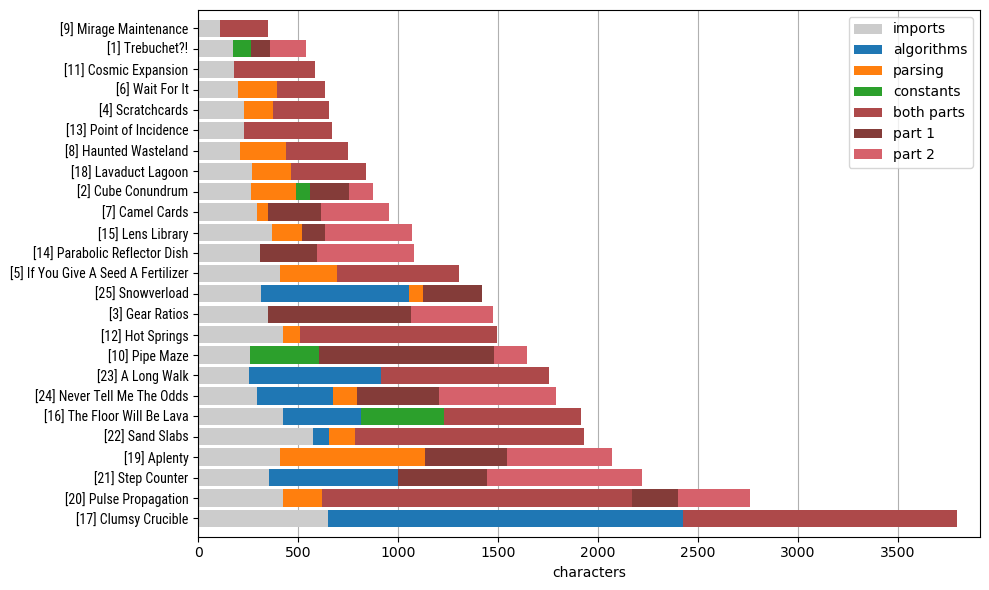

In [23]:
part_data = {
	None: ('imports', '#cccccc'),
	'GENERIC ALGORITHMS': ('algorithms', None),
	'PARSING': ('parsing', None),
	'CONSTANTS': ('constants', None),
	'PARTS': ('both parts', '#ad494a'),
	'PART 1': ('part 1', '#843c39'),
	'PART 2': ('part 2', '#d6616b'),
}
assert all(all(p in part_data for p in ps) for ps in parts.values())
#del part_data[None]

fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)
ax.yaxis.set_tick_params(labelfontfamily='Roboto Condensed')
ax.set_axisbelow(True)

metric_label, metric = "lines of code", lambda part: len(part)
metric_label, metric = "non-empty lines of code", lambda part: len([ l for l in part if l.strip() ])
metric_label, metric = "characters", lambda part: len(''.join(part))

keys = list(titles)
keys = sorted(titles, key=lambda d: sum(metric(parts[d][p]) for p in part_data if p in parts[d]))

ax.set_xlabel(metric_label)
ax.grid(axis='x')
key_labels = [ f'[{d}] {titles[d]}' for d in keys ]
accum = np.zeros(len(key_labels))
for yk, (label, color) in part_data.items():
	values = [ metric(parts[xk].get(yk, [])) for xk in keys ]
	ax.barh(key_labels, values, .85, label=label, left=accum, color=color)
	accum += values
ax.set_xlim((0, ax.get_xlim()[1] * 1.03))
mrg = 0.4
ax.set_ylim((24.5+mrg, -0.5-mrg))
plt.legend()
fig.savefig('out.png', dpi=200)